Notebook per la creazione di un'animazione che permetta la viasualizzazione dell'evoluzione dei violin plots

In [1]:
import functions as f
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.animation as animation

e_1, fwhmx_1, fwhmy_1, comax_1, cxmax_1 = f.df_from_path("../Py/ErrorPlot/Run1_complete")
e_2, fwhmx_2, fwhmy_2, comax_2, cxmax_2 = f.df_from_path("../Py/ErrorPlot/Run2_complete")
e_3, fwhmx_3, fwhmy_3, comax_3, cxmax_3 = f.df_from_path("../Py/ErrorPlot/Run3_complete")
e_4, fwhmx_4, fwhmy_4, comax_4, cxmax_4 = f.df_from_path("../Py/ErrorPlot/Run4_complete")

e = [e_1, e_2, e_3, e_4]
fwhmx = [fwhmx_1, fwhmx_2, fwhmx_3, fwhmx_4]
fwhmy = [fwhmy_1, fwhmy_2, fwhmy_3, fwhmy_4]
comax = [comax_1, comax_2, comax_3, comax_4]
cxmax = [cxmax_1, cxmax_2, cxmax_3, cxmax_4]

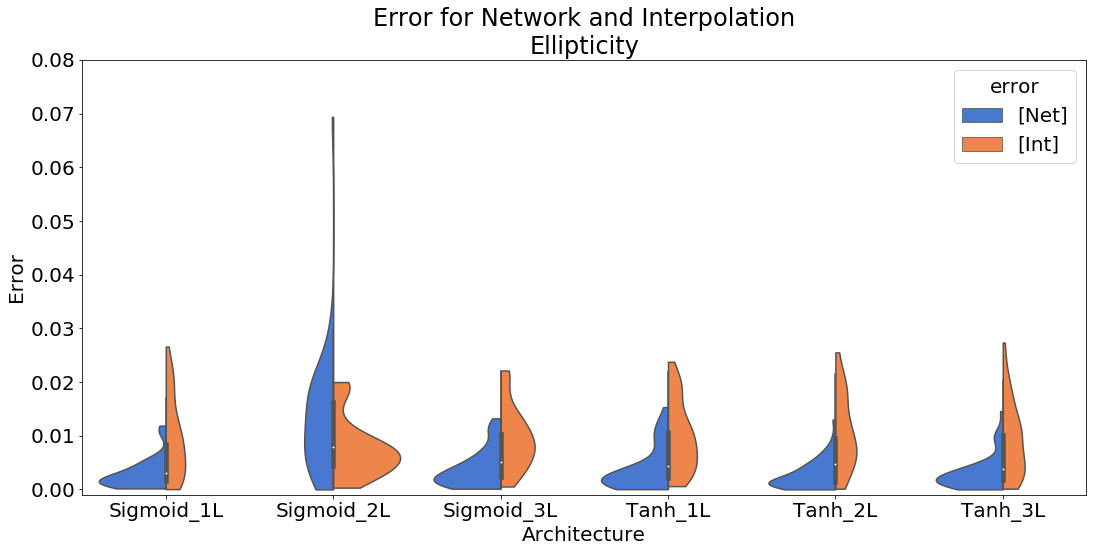

In [37]:
# parametro del quale si vuole creare l'animazione
name = 'Ellipticity'
par = e # il nome assegnato a par dev'essere uno delle liste generate nella cella precedente

fig, ax = plt.subplots(figsize = (18, 8))
    
def animate(i):
    fig.clear()
    #j += 1
    df = i
    names=df["architecture"].unique()
    names.sort()
    #fig, axs = plt.subplots(1, 1, figsize = (18, 8))
    g = sns.violinplot(x="architecture", y="value", hue="error", data=df, split=True, cut=0, order=names, palette="muted", saturation=1)
    g.set_title(f"Error for Network and Interpolation\n{name}")  
    g.set(xlabel="Architecture", ylabel="Error", ylim=(-0.001,0.08))
    plt.rcParams.update({'font.size': 20})

ani = animation.FuncAnimation(fig, animate, par, interval=500)
ani.save(f'{name}.gif', writer='imagemagick', fps=1.5)